In [1]:
import numpy as np

from pyrlmala.learning import LearningFactory
from pyrlmala.utils import Toolbox
from pyrlmala.utils.posteriordb import PosteriorDBToolbox

In [2]:
model_name = "kidiq-kidscore_momhsiq"
posteriordb_path = "../posteriordb/posterior_database"

In [3]:
pdb_toolbox = PosteriorDBToolbox(posteriordb_path)
gs = pdb_toolbox.get_gold_standard(model_name)

sample_dim = gs.shape[1]
initial_sample = np.mean(gs, axis=0)
initial_step_size = np.array([0.5])
initial_covariance = pdb_toolbox.get_fisher_information_matrix(model_name)
algorithm = "ddpg"
mcmc_env = "mala"

learning_instance = LearningFactory.create_learning_instance(
    algorithm=algorithm,
    model_name=model_name,
    posteriordb_path=posteriordb_path,
    initial_sample=initial_sample,
    initial_covariance=initial_covariance,
    initial_step_size=initial_step_size,
    hyperparameter_config_path=f"./config/{algorithm}_{mcmc_env}.toml",
    actor_config_path="./config/actor.toml",
    critic_config_path="./config/critic.toml",
)

/home/congye/Code/PythonProjects/pyrlmala/.venv/lib/python3.12/site-packages/bridgestan/model.py:140: UserWarning: Loading a shared object /home/congye/Code/PythonProjects/pyrlmala/experiments/posteriordb/posterior_database/models/stan/kidscore_momhsiq_model.so that has already been loaded.
If the file has changed since the last time it was loaded, this load may not update the library!
  warnings.warn(
/home/congye/Code/PythonProjects/pyrlmala/.venv/lib/python3.12/site-packages/bridgestan/model.py:140: UserWarning: Loading a shared object /home/congye/Code/PythonProjects/pyrlmala/experiments/posteriordb/posterior_database/models/stan/kidscore_momhsiq_model.so that has already been loaded.
If the file has changed since the last time it was loaded, this load may not update the library!
  warnings.warn(
/home/congye/Code/PythonProjects/pyrlmala/.venv/lib/python3.12/site-packages/bridgestan/model.py:140: UserWarning: Loading a shared object /home/congye/Code/PythonProjects/pyrlmala/experim

Training Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
learning_instance.train()

  0%|          | 0/50000 [00:00<?, ?it/s]

/home/congye/Code/PythonProjects/pyrlmala/src/pyrlmala/envs/env.py:215: RuntimeWarning: divide by zero encountered in log1p
  log_one_minus_alpha = np.log1p(-np.exp(log_alpha))


In [5]:
learning_instance.predict()

  0%|          | 0/10000 [00:00<?, ?it/s]

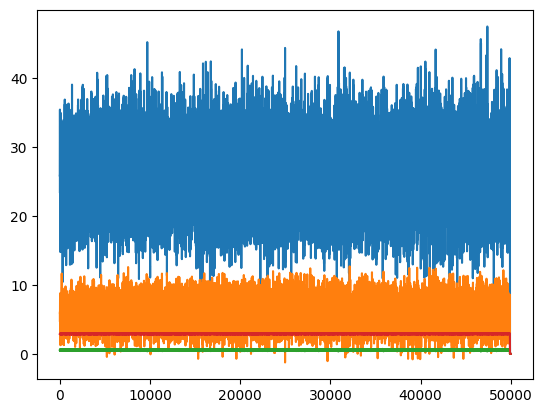

In [6]:
from matplotlib import pyplot as plt


store_accepted_sample = learning_instance.env.get_attr("store_accepted_sample")[0]
plt.plot(store_accepted_sample)
plt.show()

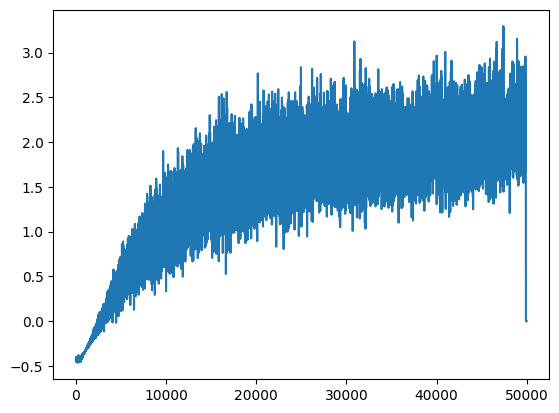

In [7]:
plt.plot(learning_instance.env.get_attr("store_action")[0][:, 0])

In [10]:
reward = learning_instance.env.get_attr("store_reward")[0]

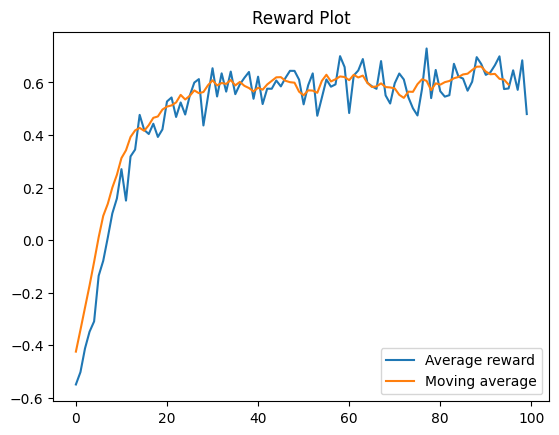

In [11]:
Toolbox.reward_plot(reward)

In [8]:
predicted_sample = learning_instance.predicted_observation[:, 0:sample_dim]

In [9]:
# Calculate the MMD
mmd = Toolbox.calculate_mmd(gs, predicted_sample)
print(mmd)

0.08066775096329844
